# 1. Gradient Descent

### Забара Илья

## №1. Convergence of Gradient Descent in non-convex smooth case

**<u>Решение.</u>** 1) $L$-липшиц.: $\forall \ x,y \hookrightarrow f(y)\leq f(x)+\nabla f(x)^T(y-x)+\dfrac{L}{2}\|y-x\|^2_2$

Положим $y=x_{k+1}=x_k-\alpha\nabla f(x_k)$, $x_k=x$, тогда:
$$
f(x_{k+1})\leq f(x_k)+\nabla f(x_k)^T(-\alpha\nabla f(x_k))+\dfrac{L}{2}\|\alpha\nabla f(x_k)\|^2_2=f(x_k)-\left( 1-\dfrac{\alpha L}{2} \right)\alpha\|\nabla f(x_k)\|^2_2
$$

2\) $\alpha\leq\dfrac{1}{L}\Rightarrow L\leq\dfrac{1}{\alpha}$, ф-я $-\alpha^2\dfrac{L}{2}+\alpha$ убывающая по $L$, значит при самом большом $L$ эта ф-я принимает наименьшее значение, тогда:
$$
f(x_{k+1})\leq f(x_k)-\left( 1-\dfrac{\alpha L}{2} \right)\alpha\|\nabla f(x_k)\|^2_2\leq f(x_k)-\left( 1-\dfrac{\alpha}{2\alpha} \right)\alpha\|\nabla f(x_k)\|^2_2=f(x_k)-\dfrac{\alpha}{2}\|\nabla f(x_k)\|^2_2
$$

3\)Из предыдущего пункта для каждой итерации: $$\begin{cases} \|\nabla f(x_0)\|^2_2 \leq \frac{2}{\alpha}(f(x_0)-f(x_1)) \\ \|\nabla f(x_1)\|^2_2 \leq \frac{2}{\alpha}(f(x_1)-f(x_2)) \\ \|\nabla f(x_2)\|^2_2 \leq \frac{2}{\alpha}(f(x_2)-f(x_3)) \\ ... \\ \|\nabla f(x_k)\|^2_2 \leq \frac{2}{\alpha}(f(x_k)-f(x_{k+1})) \end{cases}$$

После сложения всех неравенст имеем (телескопическая сумма):
$$
\sum_{i=0}^k\|\nabla f(x_i)\|^2_2 \leq \frac{2}{\alpha}(f(x_0)-f^*)
$$

4\) Чтобы это нер-во было выполнено, неободимо, чтобы $\displaystyle{\min_{i=0,...,k}}\|\nabla f(x_i)\|^2_2 \leq \frac{1}{k+1}\dfrac{2}{\alpha}(f(x_0)-f^*)$ или же 
$$
\displaystyle{\min_{i=0,...,k}}\|\nabla f(x_i)\|_2 \leq \sqrt{\frac{1}{k+1}\dfrac{2}{\alpha}(f(x_0)-f^*)}
$$

Нам нужно обеспечить, чтобы $\|\nabla f(x)\|_2<\epsilon$. Это будет выполнено при $\sqrt{\dfrac{1}{k+1}\dfrac{2}{\alpha}(f(x_0)-f^*)}\leq\epsilon\Rightarrow\dfrac{1}{k+1}\dfrac{2}{\alpha}(f(x_0)-f^*)\leq\epsilon^2\Rightarrow k+1\geq\dfrac{1}{\epsilon^2}\dfrac{2}{\alpha}(f(x_0)-f^*)$, т.е. для заданной точности $\epsilon$ необходимо $K = \dfrac{1}{\epsilon^2}\dfrac{2}{\alpha}(f(x_0)-f^*)$ итераций, что и есть $\mathbb{O}\left(\dfrac{1}{\epsilon^2}\right)$.

**<u>Ответ:</u>** доказано.

## №2. How gradient descent convergence depends on the condition number and dimensionality.

Давайте для начала определим все необходимые функции для задачи:

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar


def quadratic_function(x, A, b):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

def grad_quadratic(x, A, b):
    return np.dot(A, x) - b

def generate_quadratic_problem(cond_number, n):
    """ Функция генерирует случайную квадратичную задачу и фиксированную (по условию) начальную точку размера n из единиц """
    a = np.random.uniform(low=1, high=cond_number, size=n)
    a[np.argmin(a)] = 1
    a[np.argmax(a)] = cond_number
    
    A = np.diag(a)
    
    b = np.random.rand(n)

    x_0 = np.ones(n)
    
    return A, b, x_0


def gradient_descent(start_point, A, b, eps=1e-5, max_iter=1000):
    """ Функция возвращает количество итерций градиентного спуска для квадратичной задачи """
    learning_rate = 1 / (np.min(A) + np.max(A))
    x = start_point.copy()
    grad_0 = grad_quadratic(x, A, b)
    trajectory = [x.copy()]

    for i in range(max_iter):
        grad = grad_quadratic(x, A, b)
        x -= learning_rate * grad
        trajectory.append(x.copy())
        if np.dot(grad, grad) <= eps * np.dot(grad_0, grad_0):
            break

    return len(trajectory)

А теперь на основе этого сформируем данные о числе итераций для задачи размерности $n_1=10$. Диапазон чисел обусловленности будем, например, смотреть в пределах [1, 400], возьмём 100 точек. Сгенерируем, например, три таких набора данных для трёх разных задач, т.к. задачи генерируются рандомным образом:

In [271]:
cond_numbers = np.linspace(1, 400, 100)
n1 = 10
iterations1n1 = []
iterations2n1 = []
iterations3n1 = []

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n1)
    iter_count = gradient_descent(x_0, A, b)
    iterations1n1.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n1)
    iter_count = gradient_descent(x_0, A, b)
    iterations2n1.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n1)
    iter_count = gradient_descent(x_0, A, b)
    iterations3n1.append(iter_count)

И теперь для другой размерности $n_2=100$:

In [272]:
n2 = 100
iterations1n2 = []
iterations2n2 = []
iterations3n2 = []

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n2)
    iter_count = gradient_descent(x_0, A, b)
    iterations1n2.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n2)
    iter_count = gradient_descent(x_0, A, b)
    iterations2n2.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n2)
    iter_count = gradient_descent(x_0, A, b)
    iterations3n2.append(iter_count)

Теперь для размерности $n_3=1000$:

In [273]:
n3 = 1000
iterations1n3 = []
iterations2n3 = []
iterations3n3 = []

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n3)
    iter_count = gradient_descent(x_0, A, b)
    iterations1n3.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n3)
    iter_count = gradient_descent(x_0, A, b)
    iterations2n3.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n3)
    iter_count = gradient_descent(x_0, A, b)
    iterations3n3.append(iter_count)

Ну и для $n_4=5000$ давайте ещё сделаем:

In [274]:
n4 = 5000
iterations1n4 = []
iterations2n4 = []
iterations3n4 = []

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n4)
    iter_count = gradient_descent(x_0, A, b)
    iterations1n4.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n4)
    iter_count = gradient_descent(x_0, A, b)
    iterations2n4.append(iter_count)

for cn in cond_numbers:
    A, b, x_0 = generate_quadratic_problem(cn, n4)
    iter_count = gradient_descent(x_0, A, b)
    iterations3n4.append(iter_count)

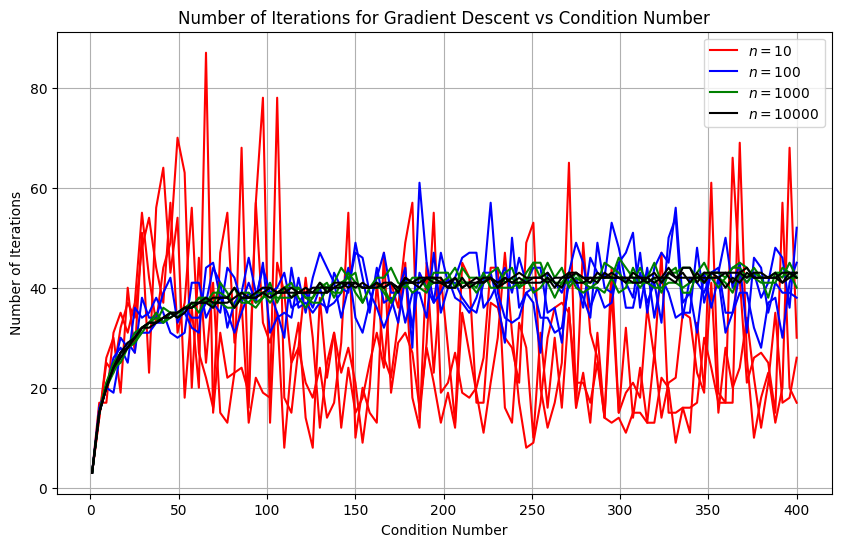

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(cond_numbers, iterations1n1, linestyle='-', color='r', label=r'$n=10$')
plt.plot(cond_numbers, iterations2n1, linestyle='-', color='r')
plt.plot(cond_numbers, iterations3n1, linestyle='-', color='r')
plt.plot(cond_numbers, iterations1n2, linestyle='-', color='b', label=r'$n=100$')
plt.plot(cond_numbers, iterations2n2, linestyle='-', color='b')
plt.plot(cond_numbers, iterations3n2, linestyle='-', color='b')
plt.plot(cond_numbers, iterations1n3, linestyle='-', color='g', label=r'$n=1000$')
plt.plot(cond_numbers, iterations2n3, linestyle='-', color='g')
plt.plot(cond_numbers, iterations3n3, linestyle='-', color='g')
plt.plot(cond_numbers, iterations1n4, linestyle='-', color='k', label=r'$n=10000$')
plt.plot(cond_numbers, iterations2n4, linestyle='-', color='k')
plt.plot(cond_numbers, iterations3n4, linestyle='-', color='k')
plt.title("Number of Iterations for Gradient Descent vs Condition Number")
plt.xlabel("Condition Number")
plt.ylabel("Number of Iterations")
plt.legend()
plt.grid(True)
plt.show()

В итоге мы построили несколько семейств кривых для разных размерностей задачи. Из графика можно сделать следующите выводы:

1\) чем меньше размерность задачи, тем больше влияние на число итераций того, что квадратичная задача генерируется случайно;

2\) количество итераций возрастает с ростом числа обусловленности;

3\) градиентный спуск практически не чувствителен к размерности задачи по числу итераций.

Стоит отметить также особенность, связанную с выбором шага для градиентного спуска в этой задаче. Изначально я пробовал брать теоретически оптимальное значение для данного класса задач. Согласно теории, для данного класса задач $\alpha^{opt}=\dfrac{2}{\mu+L}$, однако данный выбор шага приводил к тому, что условие остановки $\|\nabla f(x_k)\|^2_2\leq\epsilon\cdot\|\nabla f(x_0)\|^2_2$ никогда не срабатывало, алгоритм постоянно "перепрыгивал" точку оптимума. После уменьшения шага всё заработало.

**<u>Ответ:</u>** все функции реализованы, график построен, выводы сделаны.

